## EDA on QCOM Stock

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading tha data

In [2]:
df=pd.read_csv("/content/QCOM_stock.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

Close       High        Low       Open    Volume  \
Date                                                               
2015-12-15  36.414829  37.013908  35.489670  36.179747  20086900   
2015-12-16  36.452755  36.854667  35.755096  36.589254  13308300   
2015-12-17  36.050838  37.612989  36.050838  37.400659  15328000   
2015-12-18  35.967422  36.430002  35.656509  35.921922  46440200   
2015-12-21  36.975990  37.104907  36.050834  36.103917  16779000   

            Daily_Return     SMA_20     SMA_50  
Date                                            
2015-12-15      0.025411  37.411386  40.788302  
2015-12-16      0.001041  37.244855  40.671528  
2015-12-17     -0.011026  37.245205  40.542362  
2015-12-18     -0.002314  37.226743  40.395757  
2015-12-21      0.028041  37.212527  40.267522

In [3]:
df.shape

(2465, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2465 entries, 2015-12-15 to 2025-10-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         2465 non-null   float64
 1   High          2465 non-null   float64
 2   Low           2465 non-null   float64
 3   Open          2465 non-null   float64
 4   Volume        2465 non-null   int64  
 5   Daily_Return  2465 non-null   float64
 6   SMA_20        2465 non-null   float64
 7   SMA_50        2465 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 173.3 KB


## Data description

In [5]:
df.describe()

Close         High          Low         Open        Volume  \
count  2465.000000  2465.000000  2465.000000  2465.000000  2.465000e+03   
mean     97.400053    98.687339    96.078689    97.399959  1.021847e+07   
std      45.991980    46.685810    45.283182    46.025509  6.944566e+06   
min      32.577702    32.827948    32.031705    32.236451  2.120200e+06   
25%      51.368263    51.925939    50.575363    51.341037  6.692000e+06   
50%     103.638298   105.133540   102.227993   103.751225  8.513700e+06   
75%     134.037567   135.888633   132.070824   134.334803  1.170130e+07   
max     220.949265   224.393548   219.888743   220.686576  1.560193e+08   

       Daily_Return       SMA_20       SMA_50  
count   2465.000000  2465.000000  2465.000000  
mean       0.000909    96.898274    96.175343  
std        0.023552    45.727735    45.376300  
min       -0.149452    34.398065    35.739317  
25%       -0.009794    50.702521    50.198510  
50%        0.000844   105.008590   106.180874  
75%        0.012234   134.514559   131.288495  
max        0.232074   205.336111   197.670691

In [6]:
df.isnull().sum()

Close           0
High            0
Low             0
Open            0
Volume          0
Daily_Return    0
SMA_20          0
SMA_50          0
dtype: int64

## Data Distribution

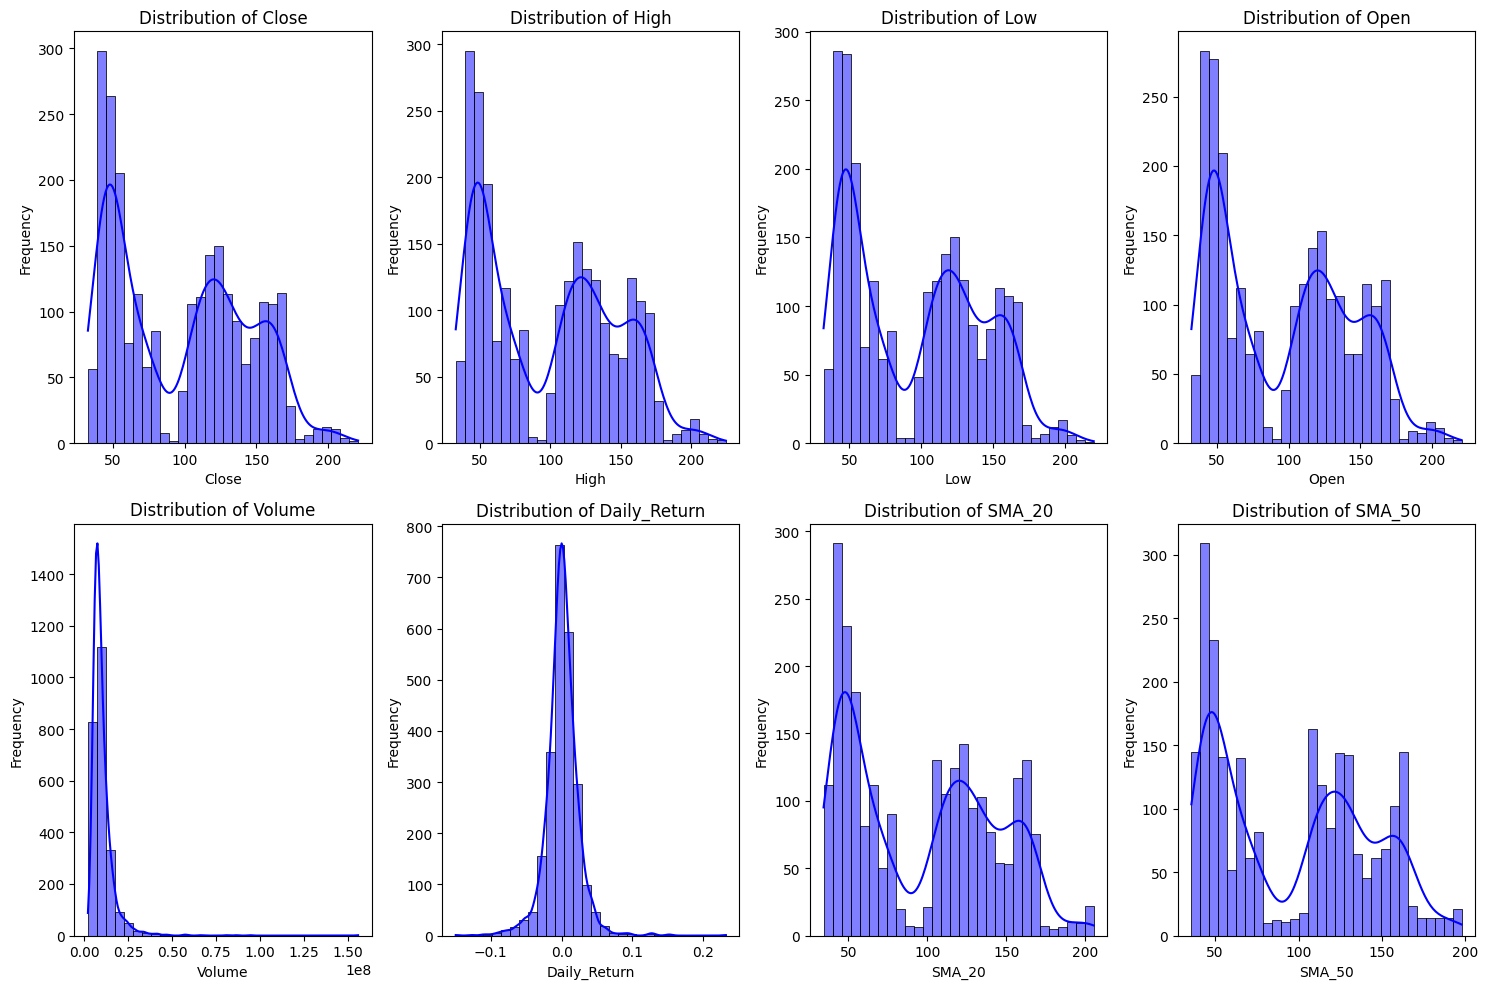

In [7]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, int(np.ceil(len(numeric_cols)/2)), i)
    sns.histplot(df[col], kde=True, color='blue', bins=30) #kde-kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### IQR

In [8]:
outliers={}
for col in df.columns:
  if df[col].dtype in ['int64','float64']:

    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    print(f"lower value of {col} :",lower)
    print(f"upper value of {col} :",upper)
    print('\n')
    outlier_values = df.loc[(df[col] < lower) | (df[col] > upper), col].values
    outliers[col] = outlier_values

print("Outliers in each column")
for col,value in outliers.items():
  print(col,value)
  print('\n')


lower value of Close : -72.63569259643555
upper value of Close : 258.0415229797363


lower value of High : -74.01810173780869
upper value of High : 261.83267448172614


lower value of Low : -71.66782880481921
upper value of Low : 254.3140160373772


lower value of Open : -73.14961316266667
upper value of Open : 258.82545334679185


lower value of Volume : -821950.0
upper value of Volume : 19215250.0


lower value of Daily_Return : -0.0428366491109381
upper value of Daily_Return : 0.0452764039905659


lower value of SMA_20 : -75.01553592681886
upper value of SMA_20 : 260.2326162338257


lower value of SMA_50 : -71.43646686553954
upper value of SMA_50 : 252.92347240447998


Outliers in each column
Close []


High []


Low []


Open []


Volume [ 20086900  46440200  20495600  21649400  27935200  24039200  21079700
  21052300  28991500  33912300  43098800  34879500  19676600  33941700
  22426300  20936900  94436000  41751800  27307900  37888200  23474400
  20057800  24822200  24664600  343

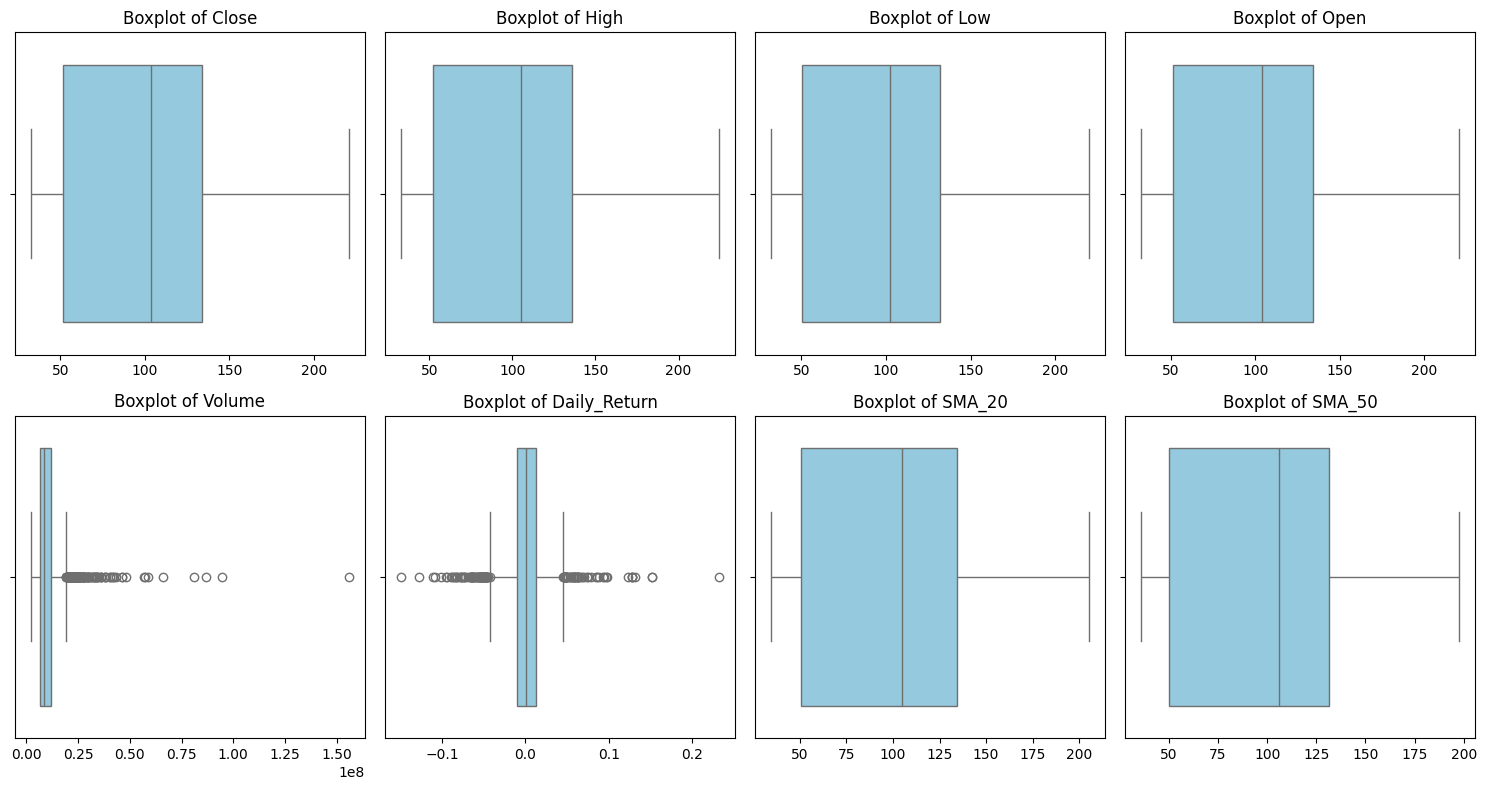

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, int(np.ceil(len(numeric_cols)/2)), i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


## Correlation of features

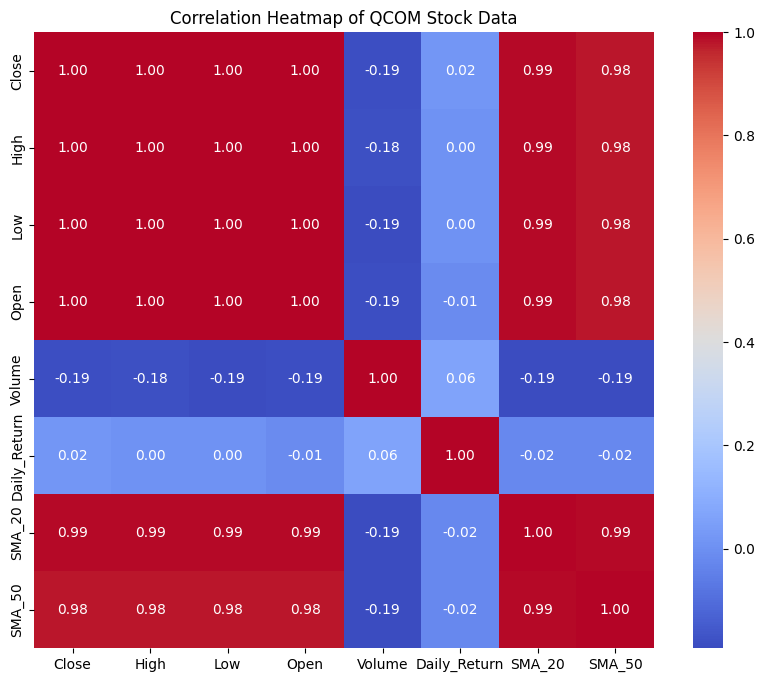

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of QCOM Stock Data')
plt.show()

BIVARIATE ANALYSIS

Close vs Volume

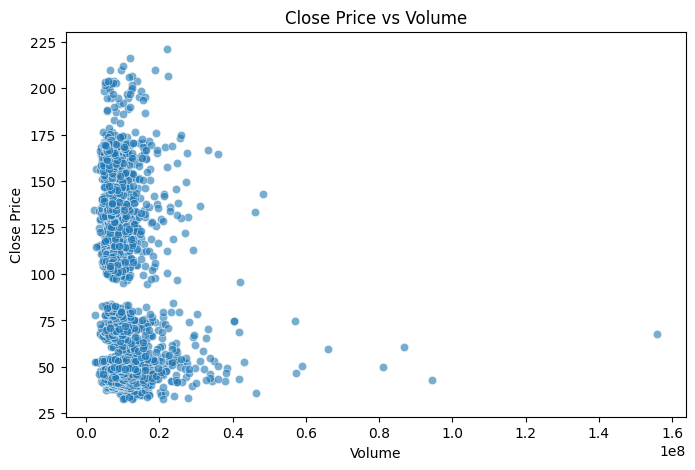

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Volume', y='Close', data=df, alpha=0.6)
plt.title('Close Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

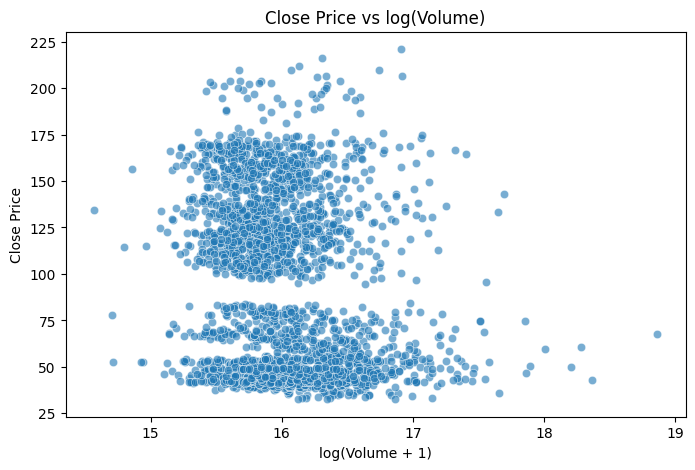

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log1p(df['Volume']), y=df['Close'], alpha=0.6)
plt.title('Close Price vs log(Volume)')
plt.xlabel('log(Volume + 1)')
plt.ylabel('Close Price')
plt.show()

In [13]:
corr_raw = df['Close'].corr(df['Volume'])
corr_log = df['Close'].corr(np.log1p(df['Volume']))
print(f"Correlation (Close vs Volume) = {corr_raw:.3f}")
print(f"Correlation (Close vs log(Volume)) = {corr_log:.3f}")

Correlation (Close vs Volume) = -0.186
Correlation (Close vs log(Volume)) = -0.228


Close vs Open

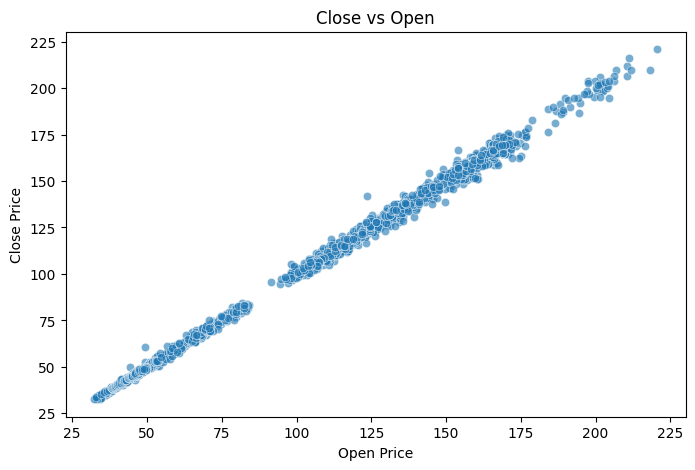

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Open', y='Close', data=df, alpha=0.6)
plt.title('Close vs Open')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

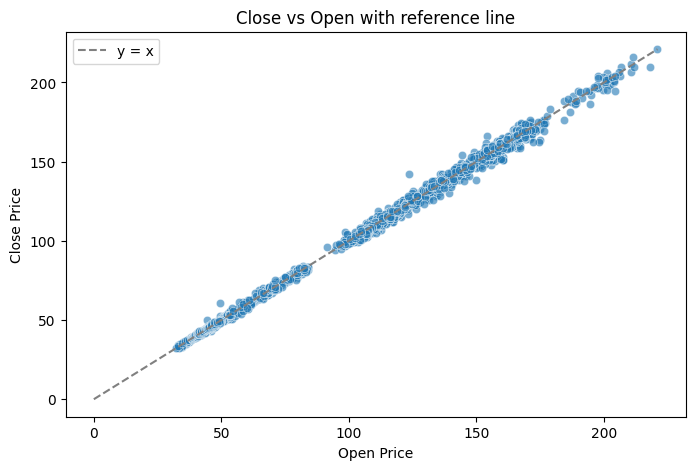

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Open', y='Close', data=df, alpha=0.6)
mx = max(df['Open'].max(), df['Close'].max())
plt.plot([0, mx], [0, mx], color='gray', linestyle='--', label='y = x')
plt.legend()
plt.title('Close vs Open with reference line')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

In [16]:
corr_open_close = df['Open'].corr(df['Close'])
print(f"Correlation (Open vs Close) = {corr_open_close:.3f}")

Correlation (Open vs Close) = 0.999


SMA_20 vs Close

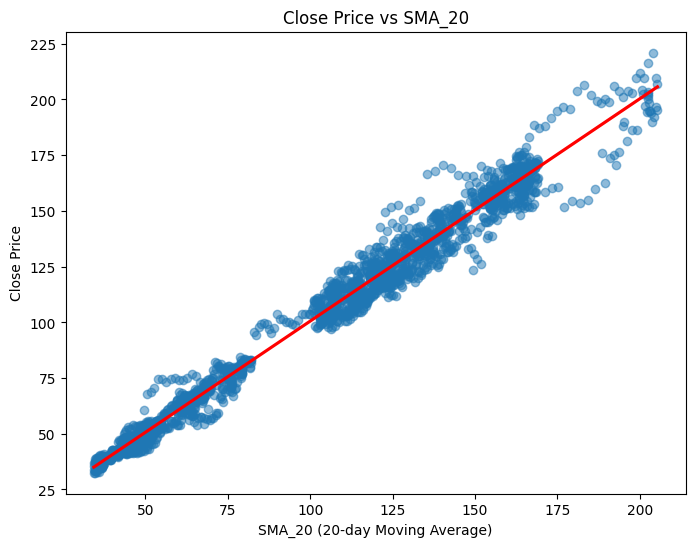

In [17]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='SMA_20', y='Close', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Close Price vs SMA_20')
plt.xlabel('SMA_20 (20-day Moving Average)')
plt.ylabel('Close Price')
plt.show()

In [18]:
corr_close_sma20 = df['Close'].corr(df['SMA_20'])
print("Correlation (Close vs SMA_20) =", round(corr_close_sma20, 3))

Correlation (Close vs SMA_20) = 0.992


Close vs SMA_50

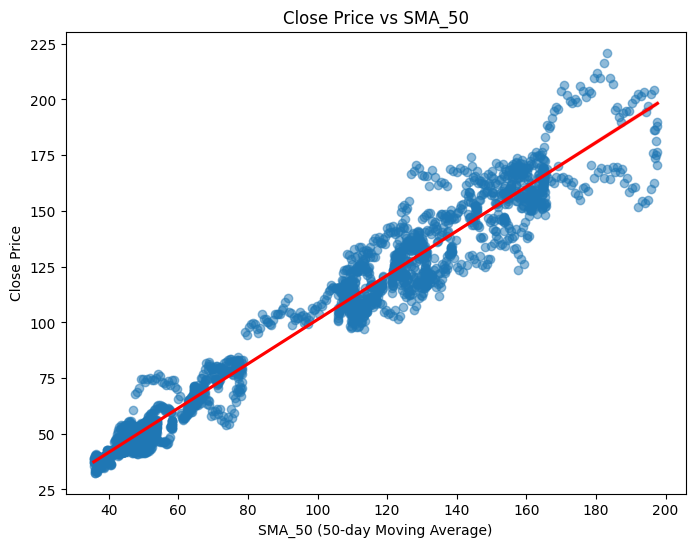

In [19]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='SMA_50', y='Close', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Close Price vs SMA_50')
plt.xlabel('SMA_50 (50-day Moving Average)')
plt.ylabel('Close Price')
plt.show()

In [20]:
corr_close_sma50 = df['Close'].corr(df['SMA_50'])
print("Correlation (Close vs SMA_50) =", round(corr_close_sma50, 3))

Correlation (Close vs SMA_50) = 0.979


Close vs Daily_Return

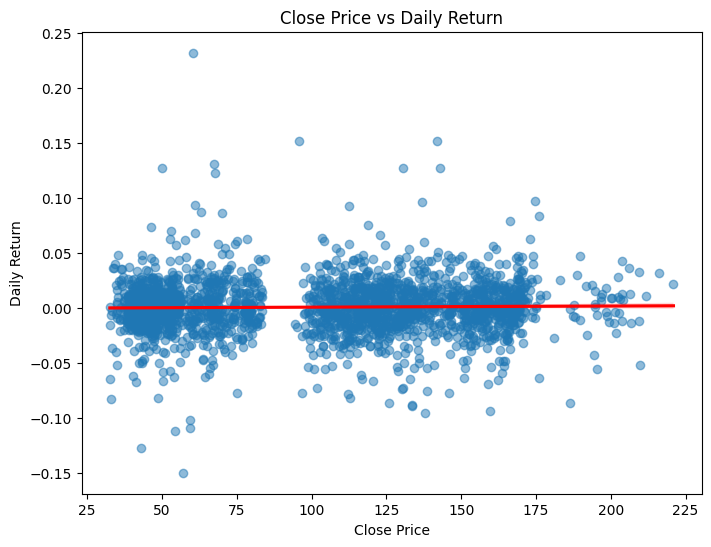

In [21]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Close', y='Daily_Return', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Close Price vs Daily Return')
plt.xlabel('Close Price')
plt.ylabel('Daily Return')
plt.show()

In [22]:
corr_close_return = df['Close'].corr(df['Daily_Return'])
print("Correlation (Close vs Daily_Return) =", round(corr_close_return, 3))

Correlation (Close vs Daily_Return) = 0.02


Volume vs Daily_Return

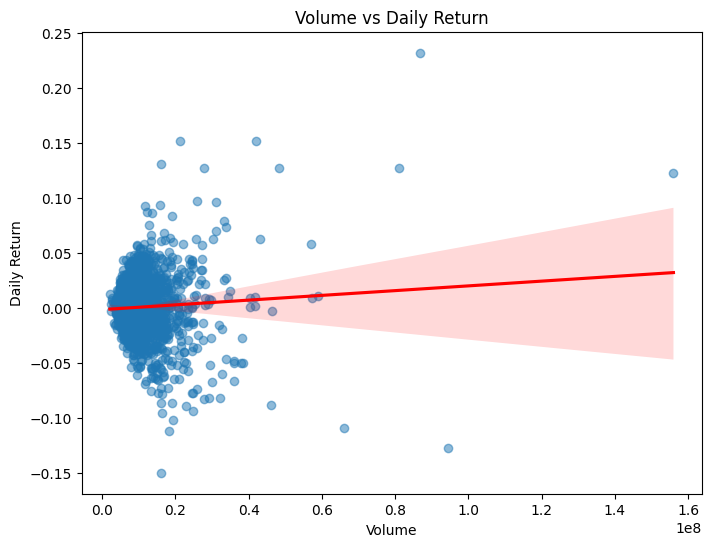

In [23]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Volume', y='Daily_Return', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Volume vs Daily Return')
plt.xlabel('Volume')
plt.ylabel('Daily Return')
plt.show()

In [24]:
corr_vol_return = df['Volume'].corr(df['Daily_Return'])
print("Correlation (Volume vs Daily_Return) =", round(corr_vol_return, 3))

Correlation (Volume vs Daily_Return) = 0.064


MULTIVARIATE ANALYSIS

Price Trend vs Volume

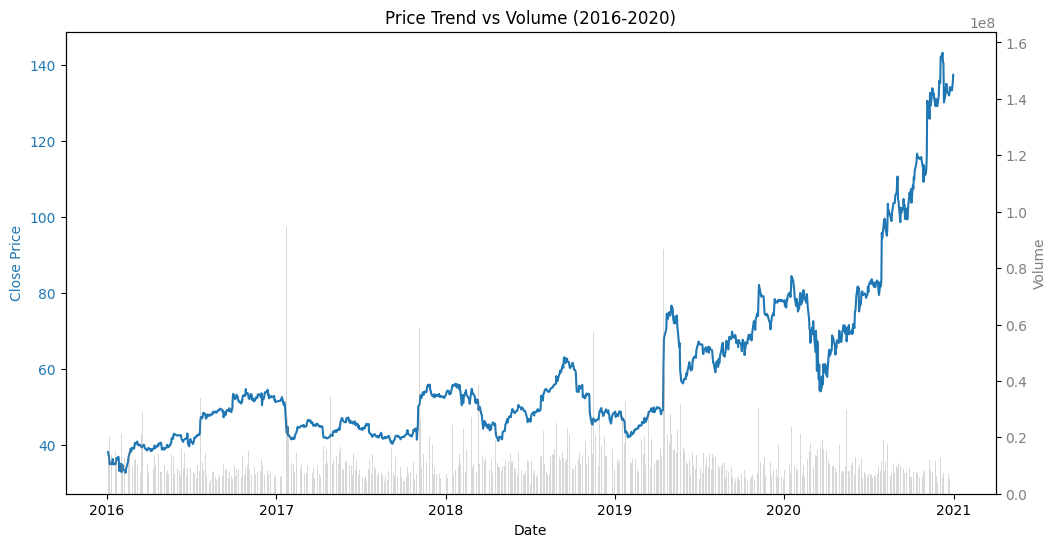

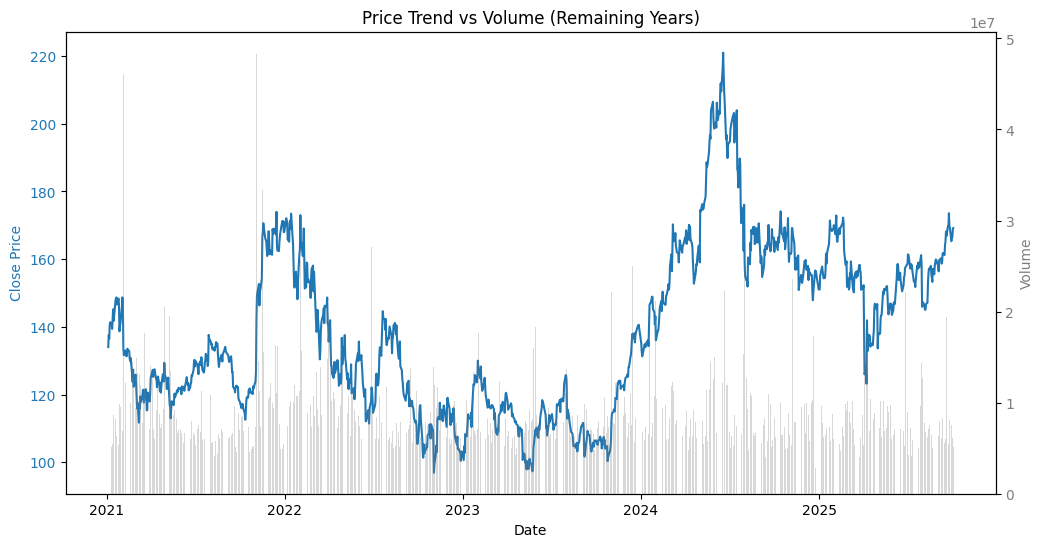

In [25]:
# Split data into two periods
df_2016_2020 = df[(df.index.year >= 2016) & (df.index.year <= 2020)].copy()
df_remaining = df[df.index.year > 2020].copy()

# Plot for 2016-2020
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot close price
ax1.plot(df_2016_2020.index, df_2016_2020['Close'], color='tab:blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot volume on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(df_2016_2020.index, df_2016_2020['Volume'], color='tab:gray', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='tab:gray')
ax2.tick_params(axis='y', labelcolor='tab:gray')

plt.title('Price Trend vs Volume (2016-2020)')
plt.show()

# Plot for remaining years
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot close price
ax1.plot(df_remaining.index, df_remaining['Close'], color='tab:blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot volume on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(df_remaining.index, df_remaining['Volume'], color='tab:gray', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='tab:gray')
ax2.tick_params(axis='y', labelcolor='tab:gray')

plt.title('Price Trend vs Volume (Remaining Years)')
plt.show()

In [26]:
corr = df['Close'].pct_change().corr(df['Volume'].pct_change())
print("Correlation between price and volume changes:", corr)

Correlation between price and volume changes: 0.03714425201997044


Returns with Moving Averages

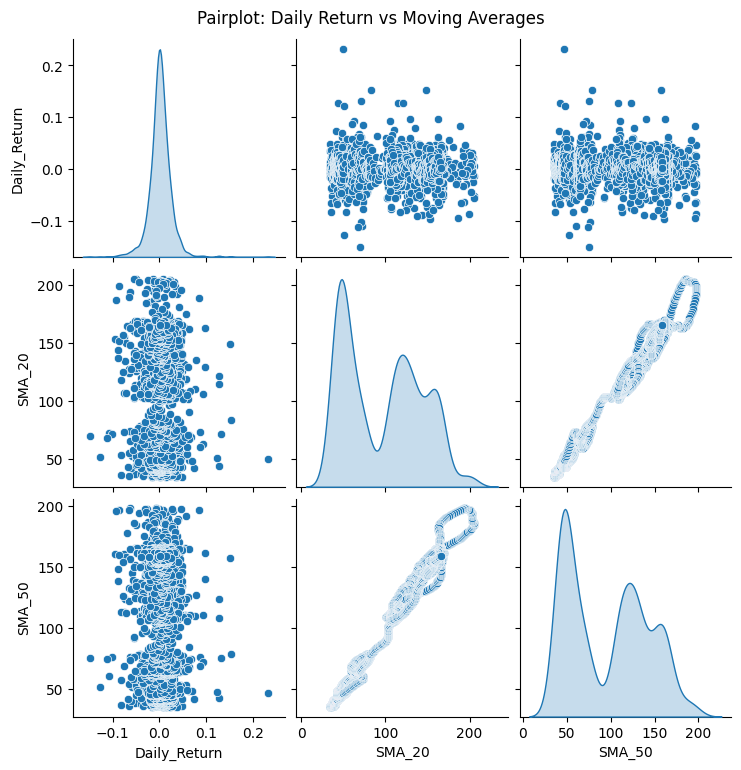

In [27]:
columns = ['Daily_Return', 'SMA_20', 'SMA_50']
sns.pairplot(df[columns], kind='scatter', diag_kind='kde')
plt.suptitle("Pairplot: Daily Return vs Moving Averages", y=1.02)
plt.show()

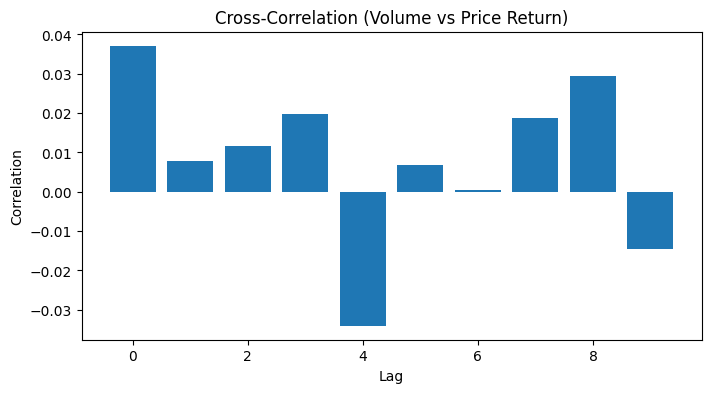

In [28]:
from statsmodels.tsa.stattools import ccf
vol_change = df['Volume'].pct_change()
returns = df['Daily_Return']

valid = vol_change.notna() & returns.notna()
vol_change = vol_change[valid]
returns = returns[valid]

lags = 10
ccf_vals = ccf(vol_change, returns)[:lags]

# Plot
plt.figure(figsize=(8,4))
plt.bar(range(lags), ccf_vals)
plt.title('Cross-Correlation (Volume vs Price Return)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

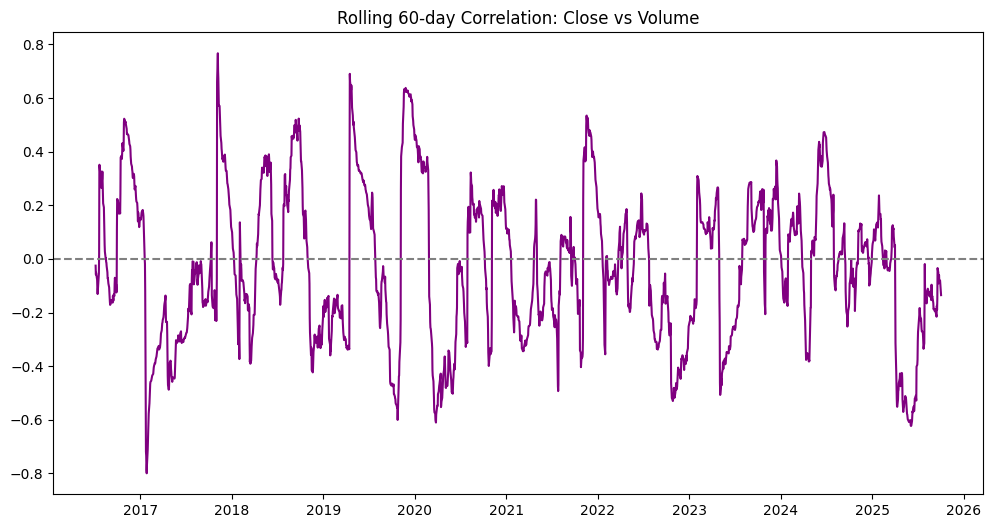

In [ ]:
df['RollingCorr_Close_Volume'] = df['Close'].rolling(60).corr(df['Volume'])
plt.figure(figsize=(12,6))
plt.plot(df.index, df['RollingCorr_Close_Volume'], color='purple')
plt.title('Rolling 60-day Correlation: Close vs Volume')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

## Time Series Analysis

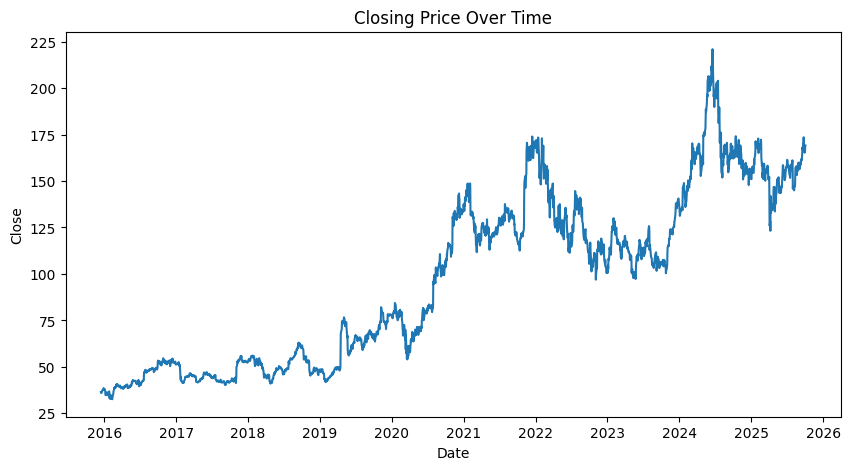

In [30]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], model='additive', period=365)

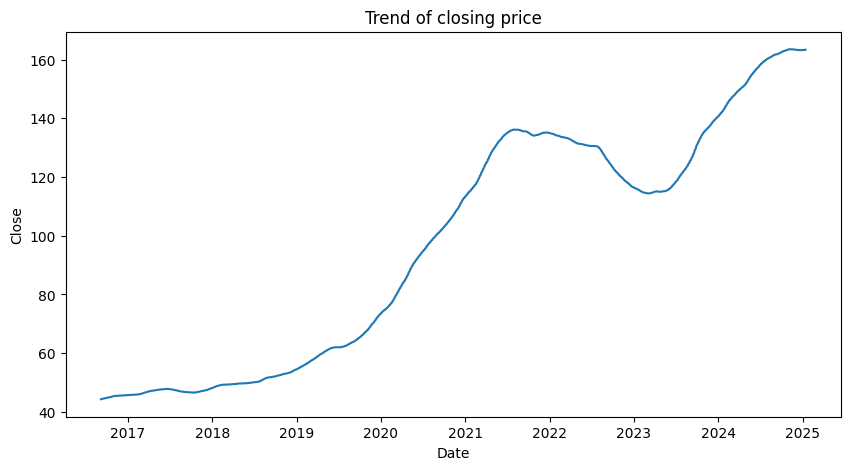

In [33]:
# Plot the Trend component
plt.figure(figsize=(10, 5))
plt.plot(decomposition.trend)
plt.title('Trend of closing price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

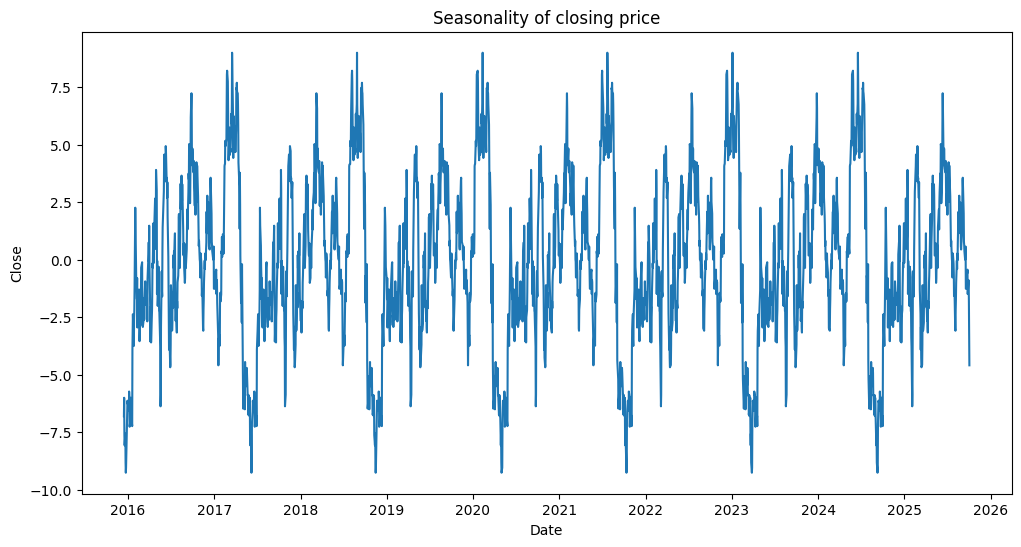

In [34]:
# Plot the Seasonal component
plt.figure(figsize=(12, 6))
plt.plot(decomposition.seasonal)
plt.title('Seasonality of closing price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

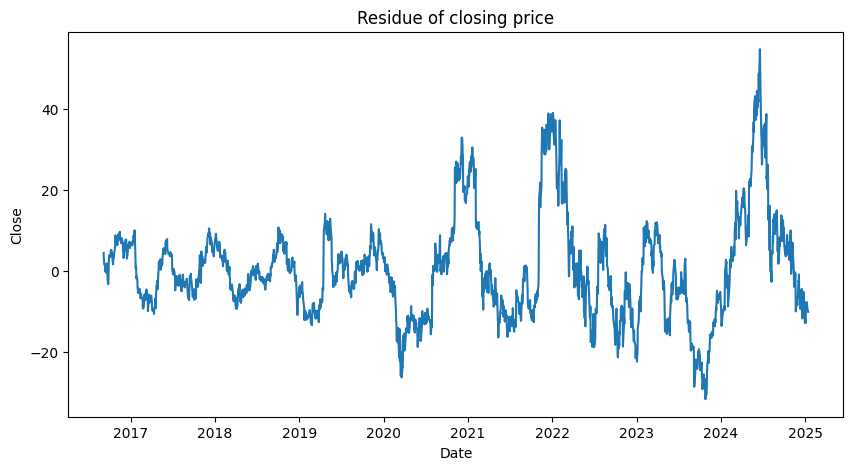

In [35]:
# Plot the Residual component
plt.figure(figsize=(10, 5))
plt.plot(decomposition.resid)
plt.title('Residue of closing price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

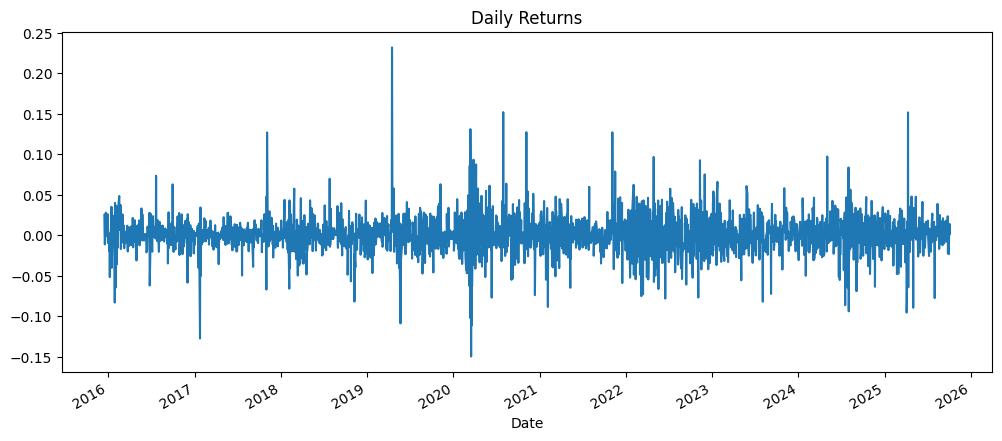

In [36]:
df['Daily_Return'].plot(figsize=(12,5), title='Daily Returns')

<Axes: title={'center': 'Daily Returns - 2025'}, xlabel='Date'>

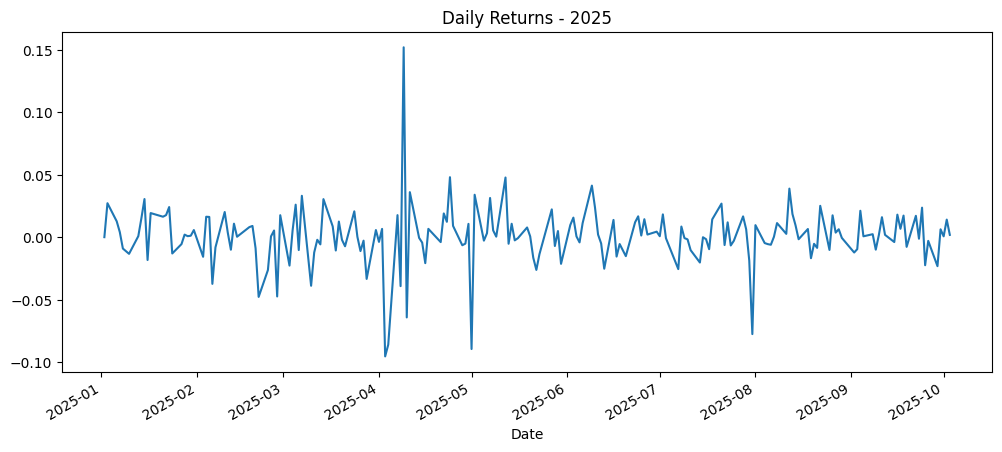

In [37]:
import datetime

current_year = datetime.datetime.now().year
df_current_year = df.loc[df.index.year == current_year].copy()

df_current_year['Daily_Return'].plot(figsize=(12,5), title=f'Daily Returns - {current_year}')

In [38]:
annual_volatility = df_current_year['Daily_Return'].std() * (252**0.5)
print(annual_volatility)

0.37912984686651335


In [40]:
df_current_year['LogReturn'] = np.log(df_current_year['Close'] / df_current_year['Close'].shift(1))
df_current_year['RollingVol20'] = df_current_year['LogReturn'].rolling(20).std() * np.sqrt(252)
df_current_year['RollingVol60'] = df_current_year['LogReturn'].rolling(60).std() * np.sqrt(252)

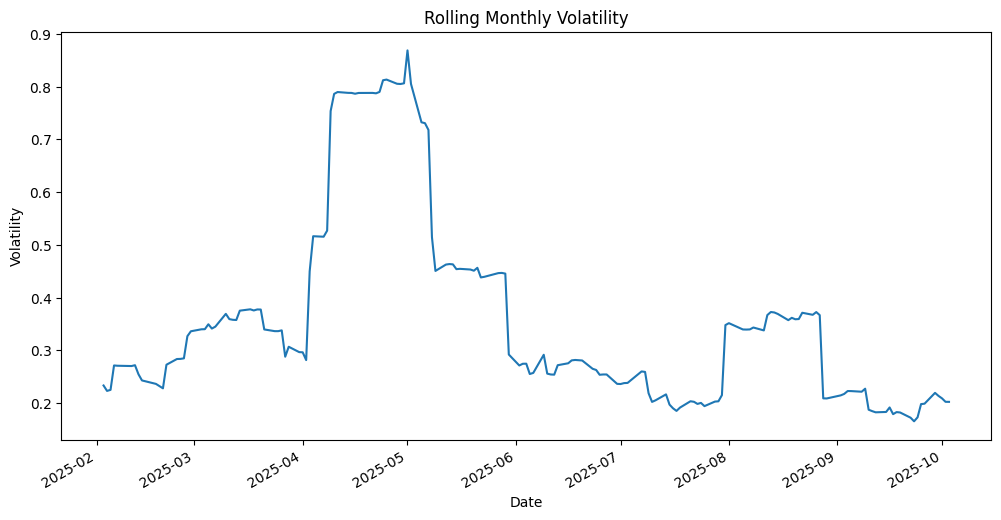

In [41]:
plt.figure(figsize=(12,6))
df_current_year['RollingVol20'].plot(title='Rolling Monthly Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

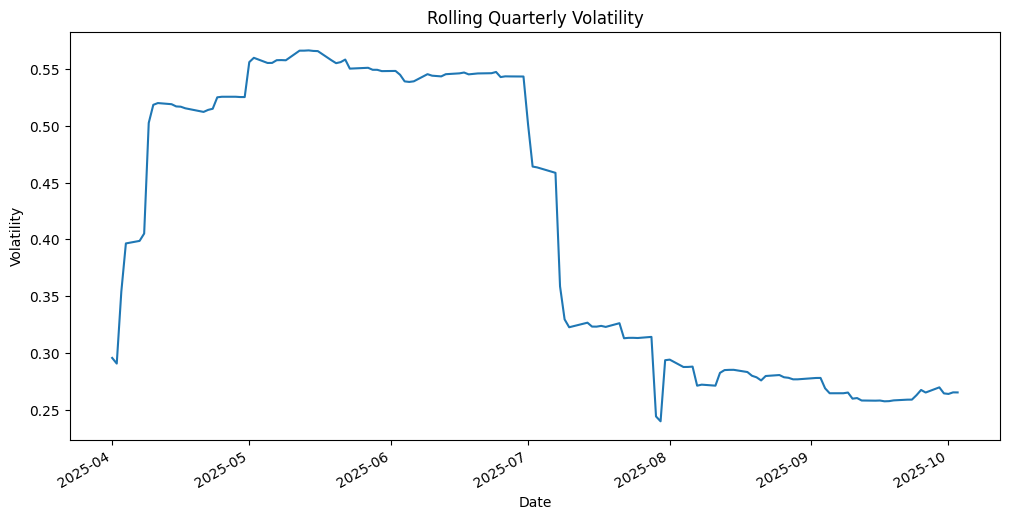

In [42]:
plt.figure(figsize=(12,6))
df_current_year['RollingVol60'].plot(title='Rolling Quarterly Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

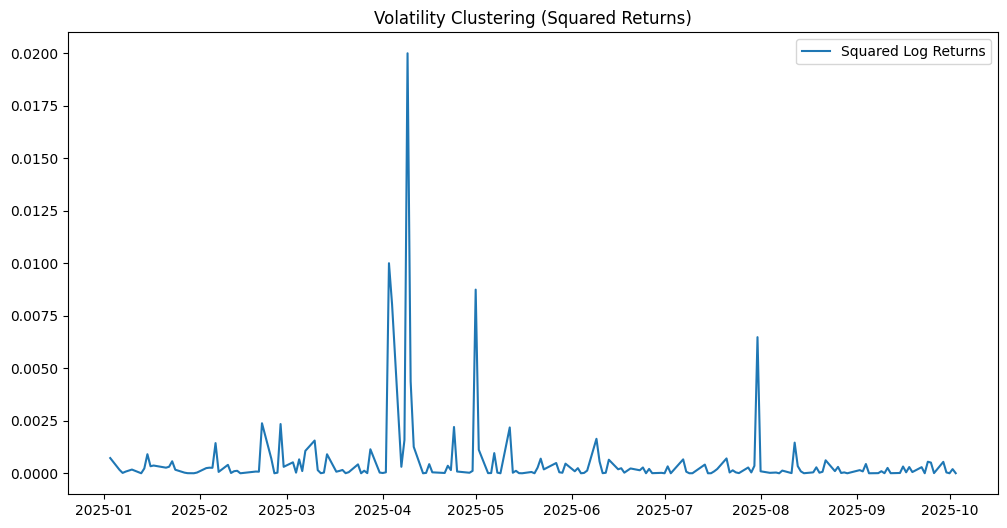

In [43]:
plt.figure(figsize=(12,6))
plt.plot(df_current_year['LogReturn']**2, label='Squared Log Returns')
plt.title('Volatility Clustering (Squared Returns)')
plt.legend()
plt.show()

In [ ]:
print(df_current_year['LogReturn'].skew(), df_current_year['LogReturn'].kurt())

-0.2155415781778229 9.595666020696674


Max Drawdown: -30.03%


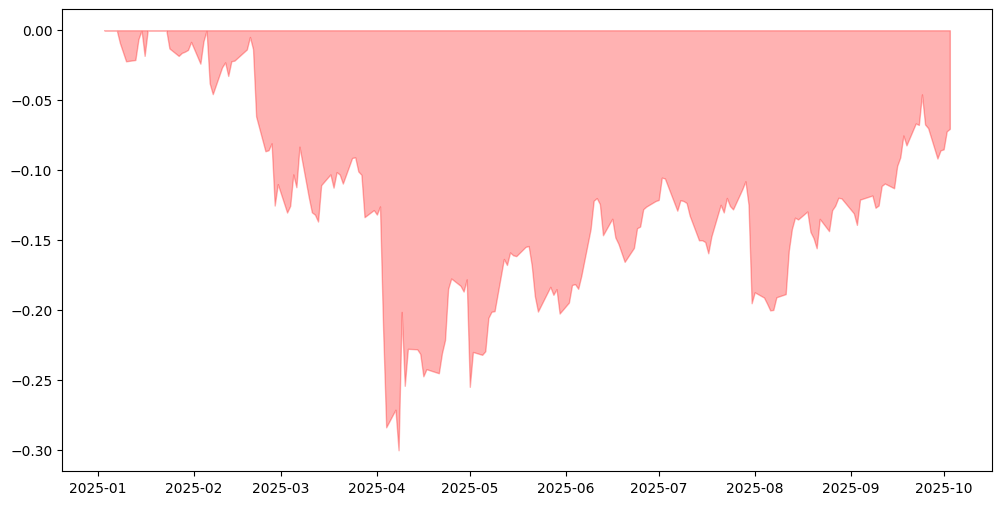

In [44]:
df_current_year['Cumulative'] = (1 + df_current_year['LogReturn']).cumprod()
df_current_year['Peak'] = df_current_year['Cumulative'].cummax()
df_current_year['Drawdown'] = df_current_year['Cumulative'] / df_current_year['Peak'] - 1
plt.figure(figsize=(12,6))
plt.fill_between(df_current_year.index, df_current_year['Drawdown'], color='red', alpha=0.3)
max_drawdown = df_current_year['Drawdown'].min()
print(f"Max Drawdown: {max_drawdown:.2%}")

Text(0.5, 1.0, 'Volatility Regimes (High=Red, Low=Blue)')

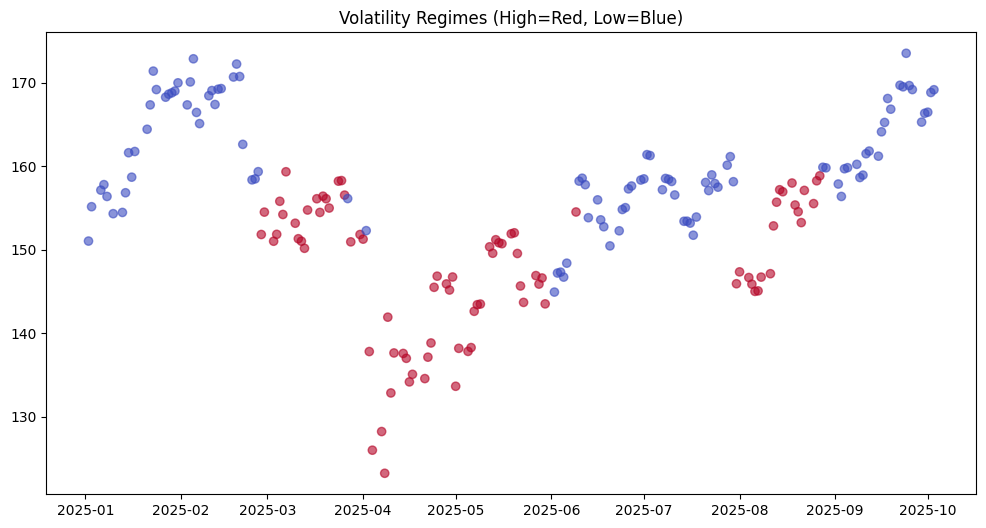

In [45]:
high_vol = df_current_year['RollingVol20'] > df_current_year['RollingVol20'].median()
plt.figure(figsize=(12,6))
plt.scatter(df_current_year.index, df_current_year['Close'], c=high_vol, cmap='coolwarm', alpha=0.6)
plt.title("Volatility Regimes (High=Red, Low=Blue)")

In [46]:
up_vol = df_current_year.loc[df_current_year['LogReturn'] > 0, 'LogReturn'].std()
down_vol = df_current_year.loc[df_current_year['LogReturn'] < 0, 'LogReturn'].std()
print(f"Up-day Volatility: {up_vol:.4f}, Down-day Volatility: {down_vol:.4f}")

Up-day Volatility: 0.0165, Down-day Volatility: 0.0210


Correlation between Rolling Volatility and Volume: 0.24812864069993443


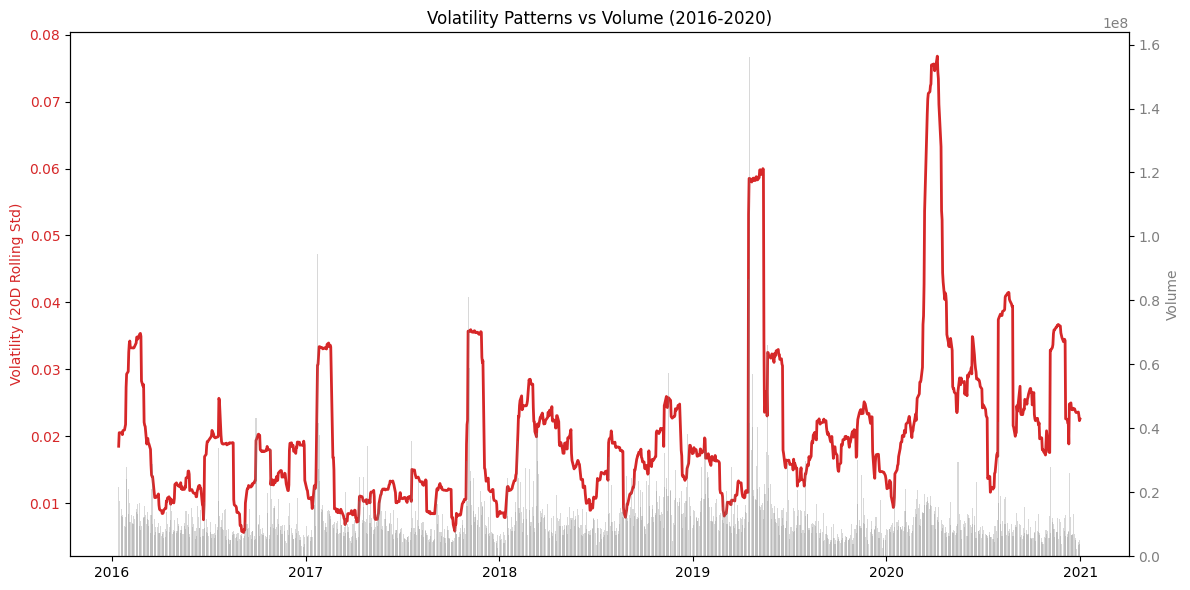

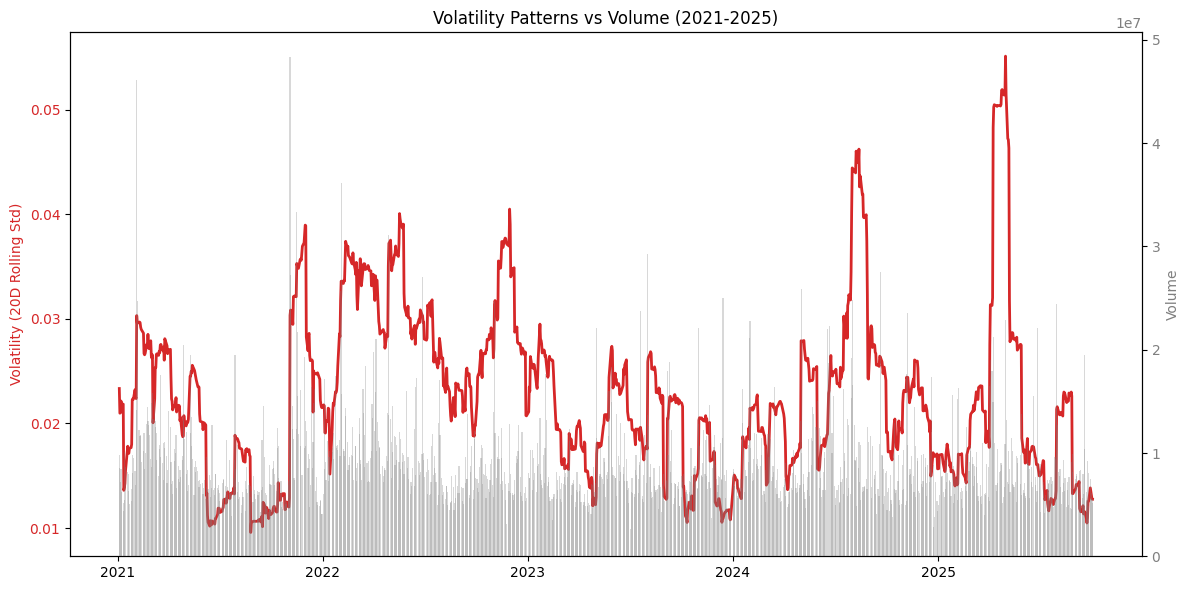

In [47]:
df['Daily_Return'] = df['Close'].pct_change()

# Compute rolling 20-day standard deviation (volatility)
df['Rolling_Volatility'] = df['Daily_Return'].rolling(window=20).std()

# Drop missing values from rolling calculation
df.dropna(inplace=True)

# Correlation between volatility and volume
corr_vol_vol = df['Rolling_Volatility'].corr(df['Volume'])
print("Correlation between Rolling Volatility and Volume:", corr_vol_vol)

# Split data into two periods
df_2016_2020 = df[(df.index.year >= 2016) & (df.index.year <= 2020)].copy()
df_remaining = df[df.index.year > 2020].copy()

# Plot for 2016-2020
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df_2016_2020.index, df_2016_2020['Rolling_Volatility'], color='tab:red', linewidth=2, label='Rolling Volatility (20D)')
ax1.set_ylabel('Volatility (20D Rolling Std)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.bar(df_2016_2020.index, df_2016_2020['Volume'], color='tab:gray', alpha=0.3, width=2, label='Volume')
ax2.set_ylabel('Volume', color='tab:gray')
ax2.tick_params(axis='y', labelcolor='tab:gray')

plt.title('Volatility Patterns vs Volume (2016-2020)')
plt.tight_layout()
plt.show()

# Plot for remaining years
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df_remaining.index, df_remaining['Rolling_Volatility'], color='tab:red', linewidth=2, label='Rolling Volatility (20D)')
ax1.set_ylabel('Volatility (20D Rolling Std)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.bar(df_remaining.index, df_remaining['Volume'], color='tab:gray', alpha=0.3, width=2, label='Volume')
ax2.set_ylabel('Volume', color='tab:gray')
ax2.tick_params(axis='y', labelcolor='tab:gray')

plt.title('Volatility Patterns vs Volume (2021-2025)')
plt.tight_layout()
plt.show()

<Axes: xlabel='Year', ylabel='LogReturn'>

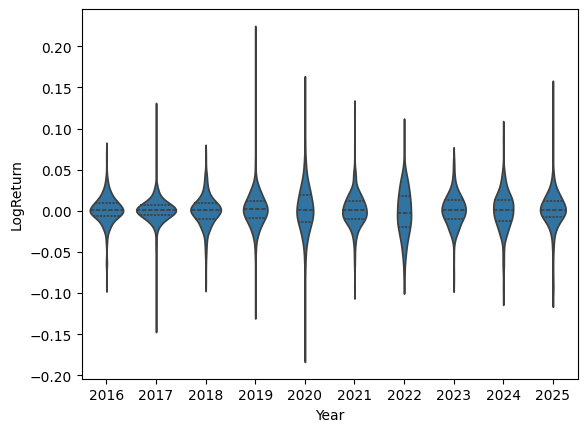

In [48]:
df['Year'] = df.index.year
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))
sns.violinplot(x='Year', y='LogReturn', data=df, inner='quartile')

Text(0.5, 1.0, 'Autocorrelation of Returns')

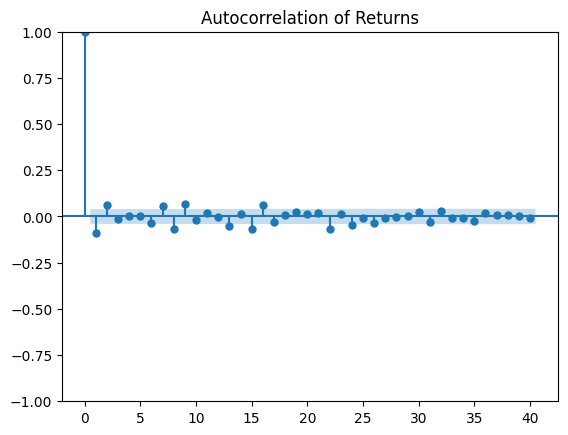

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['LogReturn'].dropna(), lags=40)
plt.title('Autocorrelation of Returns')

Text(0.5, 1.0, 'Risk-Return Scatter')

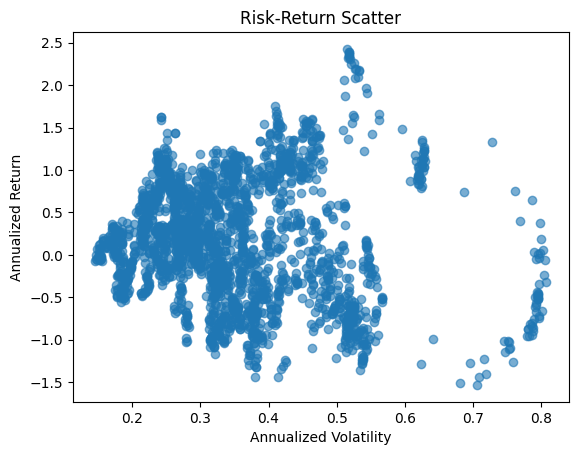

In [50]:
window = 60
rolling_ret = df['LogReturn'].rolling(window).mean() * 252
rolling_vol = df['LogReturn'].rolling(window).std() * np.sqrt(252)

plt.scatter(rolling_vol, rolling_ret, alpha=0.6)
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Risk-Return Scatter')


Text(0.5, 1.0, 'Q-Q Plot of Returns')

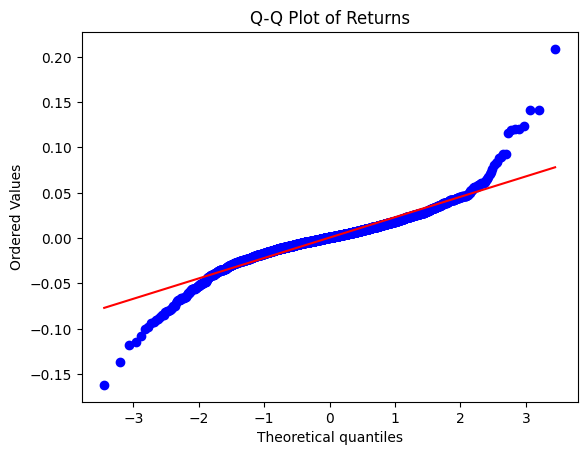

In [51]:
import scipy.stats as stats
stats.probplot(df['LogReturn'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot of Returns")

## PyGWalker

In [53]:
!pip install pygwalker
import pygwalker as pyg
walker = pyg.walk(df)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 109.4 MB/s eta 0:00:00


Box(children=(HTML(value='\n<div id="ifr-pyg-000640bd15838492esgPmESUrOLM2lVH" style="height: auto">\n    <hea…